<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will: 

- Load and preprocess the MNIST dataset for training an autoencoder. 

- Construct a simple autoencoder model using the Keras functional API. 

- Train the autoencoder on the MNIST dataset. 

- Evaluate the performance of the trained autoencoder. 

- Fine-tune the autoencoder to improve its performance. 

- Use the autoencoder to denoise images. 


----


### Step-by-Step Instructions: 

#### Step 1: Data Preprocessing 

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector. 


In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

#### Step 2: Building the Autoencoder Model 

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 


In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

#### Step 3: Training the Autoencoder 

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 


In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3538 - val_loss: 0.1683
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1585 - val_loss: 0.1364
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1344 - val_loss: 0.1249
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1246 - val_loss: 0.1179
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1180 - val_loss: 0.1127
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1132 - val_loss: 0.1088
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1097 - val_loss: 0.1057
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1062 - val_loss: 0.1032
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1043 - val_loss: 0.1015
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1027 - val_loss: 0.1002
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1012 - val_loss: 0.0989
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

#### Step 4: Evaluating the Autoencoder 

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


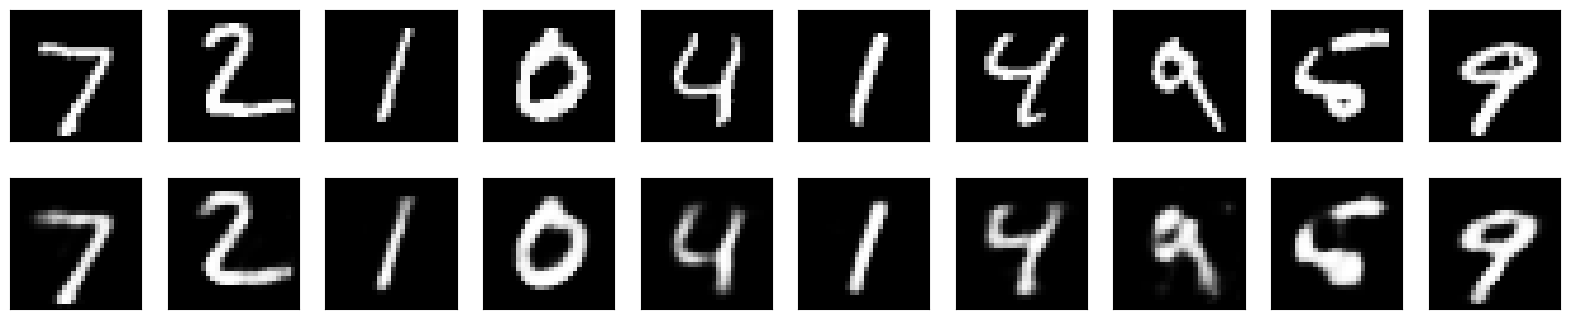

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


#### Step 5: Fine-Tuning the Autoencoder 

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [5]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0953 - val_loss: 0.0927
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0935 - val_loss: 0.0927
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0935 - val_loss: 0.0925
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0934 - val_loss: 0.0922
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0933 - val_loss: 0.0922
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0930 - val_loss: 0.0926
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0930 - val_loss: 0.0921
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0929 - val_loss: 0.0920
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0929 - val_loss: 0.0919
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0929 - val_loss: 0.0919


#### Step 6: Denoising Images with Autoencoder 

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2106 - val_loss: 0.1425
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1402 - val_loss: 0.1329
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1323 - val_loss: 0.1292
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1288 - val_loss: 0.1266
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1271 - val_loss: 0.1255
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1257 - val_loss: 0.1249
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1251 - val_loss: 0.1242
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1245 - val_loss: 0.1238
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - val_loss: 0.1234
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1236 - val_loss: 0.1232
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1233 - val_loss: 0.1228
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

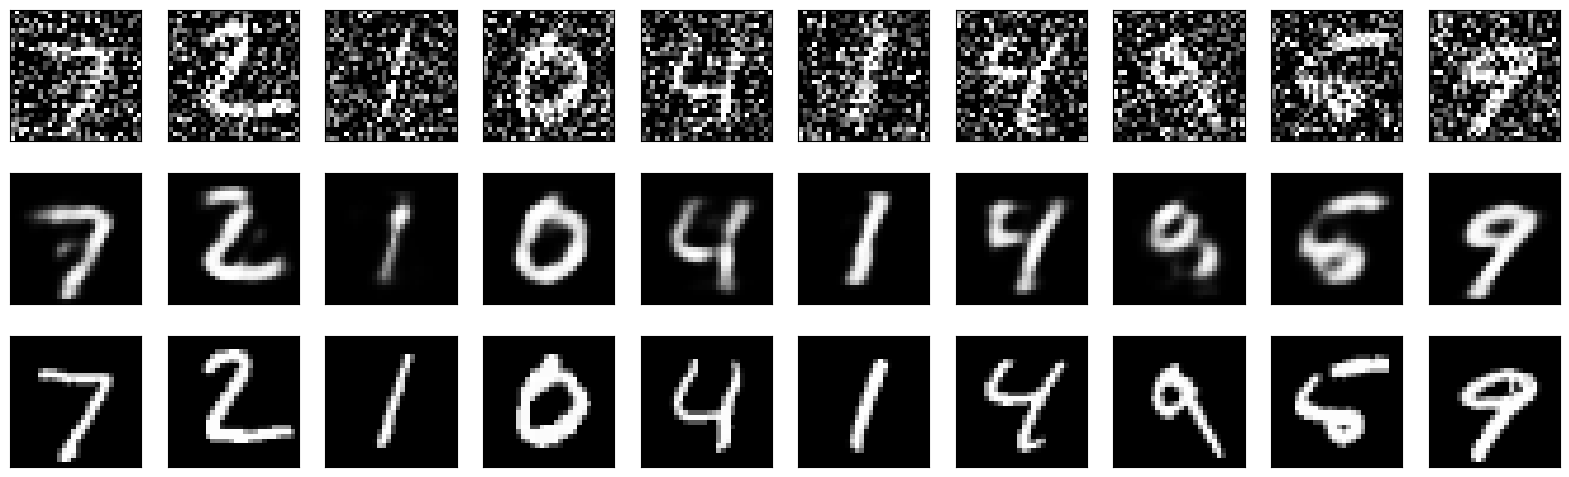

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Practice Exercises: 

### Exercise 1: Exploring Different Bottleneck Sizes 

#### Objective: 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 

#### Instructions: 

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 


In [9]:
bottleneck_size = [16, 32, 64]
autoencoders = []

for size in bottleneck_size:
    # Encoder 
    input_layer = Input(shape=(784,)) 
    encoded = Dense(64, activation='relu')(input_layer) 

    # Bottleneck 
    bottleneck = Dense(size, activation='relu')(encoded) 

    # Decoder 
    decoded = Dense(64, activation='relu')(bottleneck) 
    output_layer = Dense(784, activation='sigmoid')(decoded) 

    # Autoencoder model 
    autoencoder = Model(input_layer, output_layer) 

    # Compile the model 
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
    )
    
    autoencoders.append(autoencoder) 
    
for i, size in enumerate(bottleneck_size):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print('For bottleneck size: ', size, ' loss: ', loss)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3663 - val_loss: 0.1847
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1762 - val_loss: 0.1506
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1478 - val_loss: 0.1371
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1371 - val_loss: 0.1311
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1315 - val_loss: 0.1271
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1275 - val_loss: 0.1236
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1246 - val_loss: 0.1214
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1225 - val_loss: 0.1200
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1207 - val_loss: 0.1185
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1198 - val_loss: 0.1176
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1185 - val_loss: 0.1167
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

### Exercise 2 - Adding Regularization to the Autoencoder 
 
#### Objective: 

To explore the effect of regularization on the performance of the autoencoder. 

#### Instructions: 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 


In [10]:
from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}') 

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8151 - val_loss: 0.4434
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4239 - val_loss: 0.3954
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3921 - val_loss: 0.3802
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3775 - val_loss: 0.3665
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3638 - val_loss: 0.3538
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3516 - val_loss: 0.3441
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3423 - val_loss: 0.3370
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3349 - val_loss: 0.3300
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3291 - val_loss: 0.3243
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3228 - val_loss: 0.3188
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3176 - val_loss: 0.3137
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

### Exercise 3 - Visualizing Intermediate Representations 

#### Objective: 

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 

#### Instructions: 

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


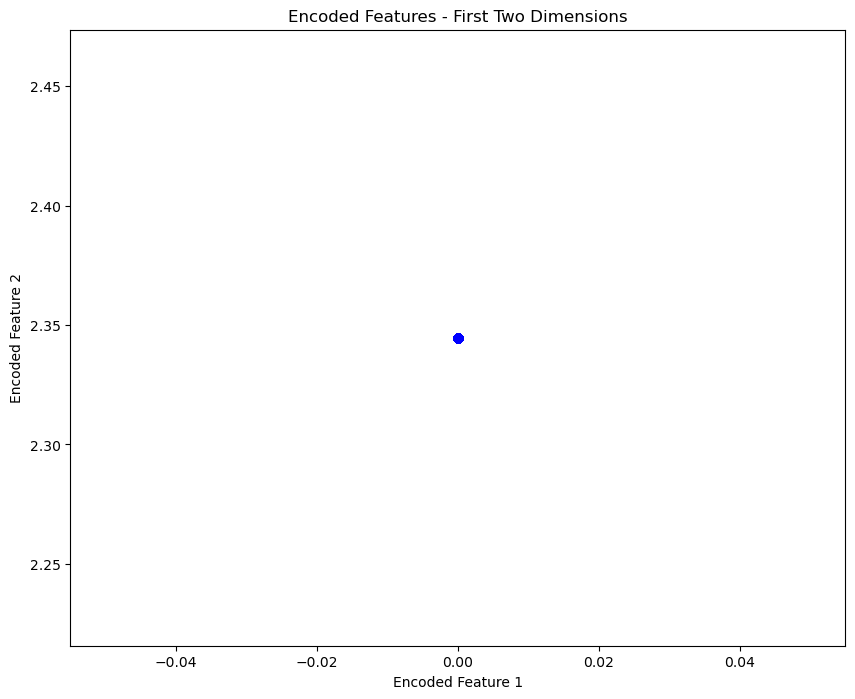

In [11]:
import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show() 

#### Conclusion: 

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images. 

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning. 


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
